In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("input/total.csv",index_col=0)
data

,MVI,diagnosticsVersionsPyRadiomics,diagnosticsVersionsNumpy,diagnosticsVersionsSimpleITK,diagnosticsVersionsPyWavelet,diagnosticsVersionsPython,diagnosticsConfigurationSettings,diagnosticsConfigurationEnabledImageTypes,diagnosticsImage-originalHash,diagnosticsImage-originalDimensionality,...,wavelet-LLLglszmSmallAreaHighGrayLevelEmphasis,wavelet-LLLglszmSmallAreaLowGrayLevelEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLglszmZoneVariance,wavelet-LLLngtdmBusyness,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmComplexity,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
NAME,,,,,,,,,,,,,,,,,,,,,
X2-1,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",29f6af1a37740af486f91ec89a90a1ca4e6984e2,3D,...,318.638010,0.005610,6.130760,0.461261,5.506943,0.179501,0.009362,1490.228725,0.414473,3.601381
X3,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",4068241f92f505e2a2dae6f92d23e6931bb461da,3D,...,253.189853,0.012959,5.685717,0.381232,10.388698,0.082228,0.016611,1010.246634,0.243355,7.384377
X4,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",37a295cd8d6a203b63878c9495593cccf75685bc,3D,...,433.031711,0.012561,5.770776,0.698225,0.787777,0.037907,0.029661,4444.669700,0.862347,16.119822
X5,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",1ac20a232efc03ba36dc4df0ea8a6fb642f5cf97,3D,...,201.231494,0.012413,5.689176,0.537954,2.280703,0.087354,0.023778,770.115810,0.338459,6.332368
X6,1,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",eef77e18d852d42eb559b217ca48634a2bcf0977,3D,...,374.894737,0.056433,3.721612,1.000000,0.000000,0.041858,0.150401,569.926316,2.030981,33.718653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L55,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",dbd3b9b2485071bef320ff53d7296898f68c82d7,3D,...,279.387486,0.025947,5.183365,0.703297,1.025146,0.020200,0.109703,808.298210,0.253232,34.297916
L56,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",91f710e9a57b891bb8a2de753d91a44464027c12,3D,...,326.311845,0.013964,5.184157,0.731034,0.515575,0.026783,0.082561,613.155316,0.285109,22.278056
L57,0,v3.0.1.post4+gad5b2de,1.19.2,2.0.2,1.1.1,3.6.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",cb601d98e9be5faf634e187ba8ca058fe6133f84,3D,...,112.369080,0.007642,5.717587,0.278552,110.601900,0.405384,0.006583,295.482604,0.074280,1.334465


In [4]:
data_ = data.copy()
data_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, X2-1 to L59
Columns: 874 entries, MVI to wavelet-LLLngtdmStrength
dtypes: float64(848), int64(9), object(17)
memory usage: 943.4+ KB


In [5]:
target = data_.iloc[:, 0]
target

NAME
X2-1    1
X3      1
X4      1
X5      1
X6      1
       ..
L55     0
L56     0
L57     0
L58     0
L59     0
Name: MVI, Length: 138, dtype: int64

In [6]:
features = data_.drop(columns=['MVI','diagnosticsVersionsPyRadiomics','diagnosticsVersionsNumpy','diagnosticsVersionsSimpleITK','diagnosticsVersionsPyWavelet',
                              'diagnosticsVersionsPython','diagnosticsConfigurationSettings','diagnosticsConfigurationEnabledImageTypes',
                              'diagnosticsImage-originalHash','diagnosticsImage-originalDimensionality',
                               'diagnosticsImage-originalSpacing','diagnosticsImage-originalSize','diagnosticsImage-originalMean','diagnosticsImage-originalMinimum',
                               'diagnosticsImage-originalMaximum','diagnosticsMask-originalHash','diagnosticsMask-originalSpacing','diagnosticsMask-originalSize',
                               'diagnosticsMask-originalBoundingBox','diagnosticsMask-originalVoxelNum','diagnosticsMask-originalVolumeNum','diagnosticsMask-originalCenterOfMassIndex',
                               'diagnosticsMask-originalCenterOfMass'
                              ])
features

,originalshapeElongation,originalshapeFlatness,originalshapeLeastAxisLength,originalshapeMajorAxisLength,originalshapeMaximum2DDiameterColumn,originalshapeMaximum2DDiameterRow,originalshapeMaximum2DDiameterSlice,originalshapeMaximum3DDiameter,originalshapeMeshVolume,originalshapeMinorAxisLength,...,wavelet-LLLglszmSmallAreaHighGrayLevelEmphasis,wavelet-LLLglszmSmallAreaLowGrayLevelEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLglszmZoneVariance,wavelet-LLLngtdmBusyness,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmComplexity,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
NAME,,,,,,,,,,,,,,,,,,,,,
X2-1,0.556183,0.304004,8.934097,29.388077,30.766256,25.378386,22.853559,30.957695,2009.419271,16.345148,...,318.638010,0.005610,6.130760,0.461261,5.506943,0.179501,0.009362,1490.228725,0.414473,3.601381
X3,0.538948,0.421506,8.462664,20.077230,25.378386,24.965288,11.442280,25.711440,1245.291667,10.820578,...,253.189853,0.012959,5.685717,0.381232,10.388698,0.082228,0.016611,1010.246634,0.243355,7.384377
X4,0.376898,0.185720,5.208266,28.043626,24.202595,25.492205,14.740596,28.391945,769.449870,10.569593,...,433.031711,0.012561,5.770776,0.698225,0.787777,0.037907,0.029661,4444.669700,0.862347,16.119822
X5,0.392714,0.229733,6.209354,27.028565,24.953490,26.476129,12.483830,26.773148,892.256973,10.614482,...,201.231494,0.012413,5.689176,0.537954,2.280703,0.087354,0.023778,770.115810,0.338459,6.332368
X6,0.396503,0.000000,0.000000,5.834307,8.310385,8.310385,5.408327,9.330729,68.250000,2.313318,...,374.894737,0.056433,3.721612,1.000000,0.000000,0.041858,0.150401,569.926316,2.030981,33.718653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L55,0.491960,0.320452,4.651530,14.515524,16.520263,17.406822,8.340038,17.460737,313.942978,7.141055,...,279.387486,0.025947,5.183365,0.703297,1.025146,0.020200,0.109703,808.298210,0.253232,34.297916
L56,0.491124,0.329871,6.792284,20.590706,16.891183,20.227225,18.690962,21.405454,616.151733,10.112599,...,326.311845,0.013964,5.184157,0.731034,0.515575,0.026783,0.082561,613.155316,0.285109,22.278056
L57,0.728034,0.554254,14.544836,26.242202,30.566942,26.468711,27.300936,31.643975,4666.411388,19.105224,...,112.369080,0.007642,5.717587,0.278552,110.601900,0.405384,0.006583,295.482604,0.074280,1.334465


In [7]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [8]:
transfer = StandardScaler()
features_ = transfer.fit_transform(features)
features_
# 数据标准化很有必要

array([[-0.2741352 , -0.38880644, -0.39349722, ...,  0.74669837,
         0.32000434, -0.34395201],
       [-0.36646711,  0.20209181, -0.45581461, ...,  0.26008714,
        -0.0244887 , -0.11173468],
       [-1.23459146, -0.98364019, -0.88600431, ...,  3.74194382,
         1.22165747,  0.42448618],
       ...,
       [ 0.64649905,  0.86966344,  0.34817059, ..., -0.46454867,
        -0.36486876, -0.48310551],
       [ 1.00920399,  1.68404208,  1.41425446, ...,  0.08775323,
        -0.31127622, -0.51755131],
       [ 0.18894464,  0.33132756,  1.50578065, ...,  0.66845289,
        -0.29908481, -0.54351399]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_features, test_features, train_target, test_target = train_test_split(
    features_, target, 
    test_size = 0.3)

In [11]:
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)

(96, 851)
(96,)
(42, 851)
(42,)


In [12]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# log = LogisticRegression(penalty='l1',max_iter = 10000000,solver='saga',C=0.001,n_jobs=-1)
log = LogisticRegression(penalty='l1',max_iter = 10000000,n_jobs=-1,solver='saga')

In [15]:
log.fit(train_features, train_target)

LogisticRegression(max_iter=10000000, n_jobs=-1, penalty='l1', solver='saga')

In [16]:
log.coef_
# 系数

array([[ 0.        , -0.00251629,  0.        ,  0.        ,  0.27412983,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.55947819,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.06909572,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.34595378,  0.        ,
         0.        ,  0.2024178 ,  0.        ,  0.        ,  0.        ,
         0.03449612,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.11891291,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.00573071,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [17]:
log.intercept_
# 截距

array([0.47463269])

In [18]:
test_predict = log.predict(test_features)
test_predict
# 预测结果

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [19]:
test_proba = log.predict_proba(test_features)
test_proba

array([[8.42049958e-01, 1.57950042e-01],
       [7.52061245e-01, 2.47938755e-01],
       [3.77992974e-03, 9.96220070e-01],
       [6.88291591e-02, 9.31170841e-01],
       [5.04696786e-01, 4.95303214e-01],
       [1.16195013e-02, 9.88380499e-01],
       [4.06995075e-01, 5.93004925e-01],
       [6.73802143e-02, 9.32619786e-01],
       [1.77252597e-01, 8.22747403e-01],
       [6.11758742e-01, 3.88241258e-01],
       [1.96482463e-04, 9.99803518e-01],
       [4.11416489e-01, 5.88583511e-01],
       [4.11544470e-01, 5.88455530e-01],
       [2.86270225e-01, 7.13729775e-01],
       [3.08084515e-04, 9.99691915e-01],
       [9.53382417e-01, 4.66175828e-02],
       [9.76206214e-01, 2.37937863e-02],
       [3.83952914e-01, 6.16047086e-01],
       [6.16789410e-01, 3.83210590e-01],
       [4.71089319e-01, 5.28910681e-01],
       [4.64444466e-01, 5.35555534e-01],
       [8.91506869e-01, 1.08493131e-01],
       [2.77657125e-01, 7.22342875e-01],
       [2.97518991e-01, 7.02481009e-01],
       [7.812870

In [20]:
log.score(test_features,test_target)

0.6428571428571429

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score
import matplotlib.pyplot as plt
accuracy_score(test_target,test_predict)
confusion_matrix(test_target,test_predict)
import seaborn as sns
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
fpr, tpr, thresholds = roc_curve(test_target, y_score)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score

In [22]:
accuracy_score(test_target,test_predict)

0.6428571428571429

In [23]:
confusion_matrix(test_target,test_predict)

array([[ 6,  4],
       [11, 21]])

In [24]:
import seaborn as sns

<Axes: >

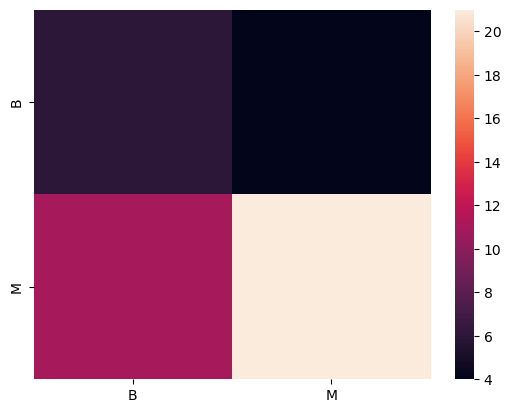

In [25]:
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])

In [26]:
y_score = log.decision_function(test_features)
y_score

array([-1.67356055, -1.109636  ,  5.57426276,  2.60481528, -0.0187877 ,
        4.44338291,  0.37640162,  2.62764618,  1.53507342, -0.45471105,
        8.53474087,  0.35811277,  0.35758428,  0.91356822,  8.08482828,
       -3.01803832, -3.71424938,  0.47280347, -0.47594297,  0.11577186,
        0.1424626 , -2.10622628,  0.95611293,  0.85914031, -1.27318262,
       -1.35108046, -0.83662091, -1.98591365, -1.2730717 ,  0.23909257,
        0.66671728,  0.35215412, -1.21685285, -1.69434556,  4.97070794,
        2.73753241,  2.543196  , -1.49912415,  6.44523503, -1.28576713,
        2.07202186,  0.70527053])

In [27]:
fpr, tpr, thresholds = roc_curve(test_target, y_score)

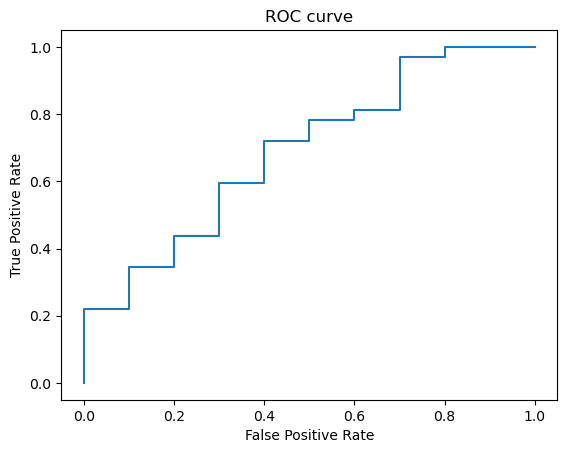

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [28]:
pip show scikit-learn

Name: scikit-learn
Version: 1.1.3
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /root/anaconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [29]:
#from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [30]:
#confusion_matrix(log, test_features, test_target)

In [32]:
Cs = np.logspace(-3,2,200)
acc_=[]
coef_ = []
for C_ in Cs:
    log_l1 = LogisticRegression(penalty='l1',C = C_,max_iter=2000, solver='liblinear')
    log_l1.fit(train_features, train_target)
    coef_.append(log_l1.coef_)
    acc_.append(log_l1.score(test_features, test_target))

In [33]:
# acc_

In [34]:
len(acc_)

200

In [35]:
# coef_

In [36]:
len(coef_)

200

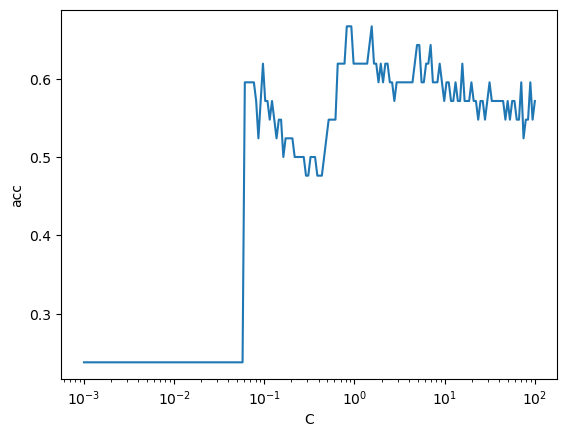

In [37]:
plt.plot(Cs, acc_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('acc')
plt.show()

In [37]:


coef_ = np.array(coef_).reshape(200,851)

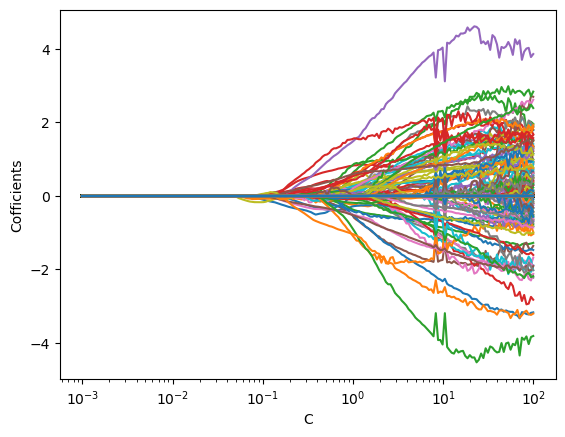

In [38]:
plt.plot(Cs, coef_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cofficients')
plt.show()

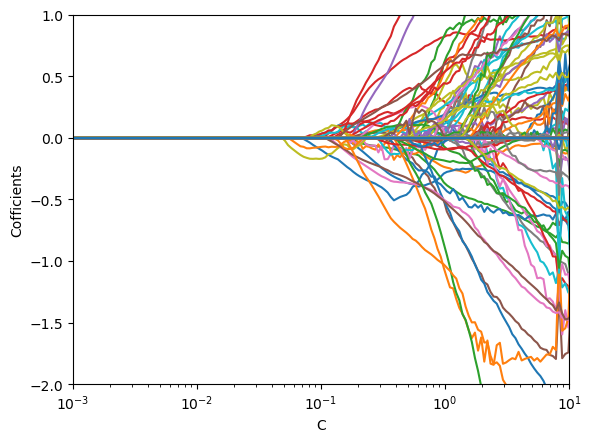

In [39]:
plt.plot(Cs, coef_)
plt.ylim([-2,1])
plt.xlim([10**-3,10])
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cofficients')
plt.show()

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly_features = PolynomialFeatures(degree=2)

In [42]:
train_features_ = poly_features.fit_transform(train_features)

In [43]:
train_features

array([[-0.73056071, -0.56990691, -0.42790781, ..., -0.3836155 ,
         0.17452563, -0.50515712],
       [ 0.07890596,  0.22929524, -0.56506549, ..., -0.43272533,
        -0.07419243, -0.27138364],
       [-0.95526715, -0.17753836, -0.70150359, ..., -0.46341379,
        -0.00959204, -0.08691933],
       ...,
       [ 0.61489384, -0.33896987, -0.10462267, ..., -0.54954595,
        -0.41418403, -0.49195947],
       [ 0.14596168,  0.09927088,  2.33807886, ..., -0.41042663,
        -0.44187784, -0.55642497],
       [ 1.71753842, -1.91760088, -1.57447032, ..., -0.42301321,
        -0.26818687,  0.2843586 ]])

In [44]:
train_features_

array([[ 1.00000000e+00, -7.30560712e-01, -5.69906907e-01, ...,
         3.04591945e-02, -8.81628628e-02,  2.55183714e-01],
       [ 1.00000000e+00,  7.89059635e-02,  2.29295240e-01, ...,
         5.50451605e-03,  2.01346107e-02,  7.36490811e-02],
       [ 1.00000000e+00, -9.55267149e-01, -1.77538356e-01, ...,
         9.20071742e-05,  8.33733475e-04,  7.55497073e-03],
       ...,
       [ 1.00000000e+00,  6.14893839e-01, -3.38969873e-01, ...,
         1.71548414e-01,  2.03761758e-01,  2.42024120e-01],
       [ 1.00000000e+00,  1.45961676e-01,  9.92708827e-02, ...,
         1.95256027e-01,  2.45871865e-01,  3.09608747e-01],
       [ 1.00000000e+00,  1.71753842e+00, -1.91760088e+00, ...,
         7.19241963e-02, -7.62612435e-02,  8.08598157e-02]])

In [45]:
train_features_.shape

(117, 363378)

In [46]:
log_ = LogisticRegression(max_iter = 10000)

In [47]:
log_.fit(train_features_, train_target)

LogisticRegression(max_iter=10000)

In [48]:
test_features_ = poly_features.transform(test_features)
log_.score(test_features_,test_target)

0.47619047619047616